In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift


### K-Means

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def k_means(img, K, iterations):
    
    clusters=(np.random.random((3,3))*255.0)
    #Run
    for i in range (iterations):        
        if(3 == K):
            labels = np.array([np.argmin([np.linalg.norm(j-clusters[0]),np.linalg.norm(j-clusters[1]), np.linalg.norm(j-clusters[2])], axis=0)for j in img])
        else:
            labels = np.array([np.argmin([np.linalg.norm(j-clusters[0]),np.linalg.norm(j-clusters[1])], axis=0)for j in img])
        
        clusters =[]
        clusters=addClus(K, img, labels)
         
    return labels, clusters

def addClus(K, img, labels):
    ls=[]
    for n in range(K):
        ls.append(np.array(img[labels == n].mean(axis=0)))
    return ls


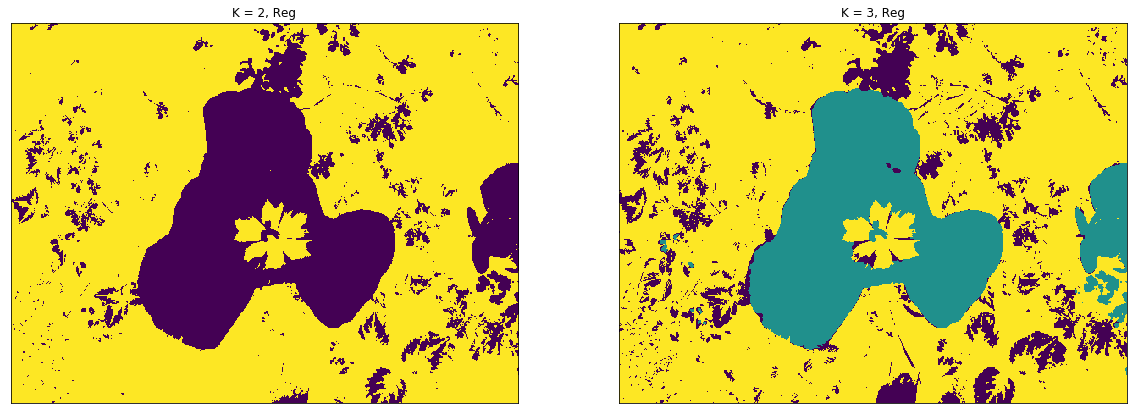

In [9]:
#Regular, Have to run twice for some reason
img = cv2.imread('flower.jpg')
newimg = img.reshape((-1,3))
height, width = img.shape[:2]
l2, c2 = k_means(newimg, 2, 5)
l3, c3 = k_means(newimg, 3, 5)

im2 = np.reshape(l2, (height, width))
im3 = np.reshape(l3, (height, width))

plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(im2)
plt.title('K = 2, Reg'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(im3)
plt.title('K = 3, Reg'), plt.xticks([]), plt.yticks([])
plt.show()

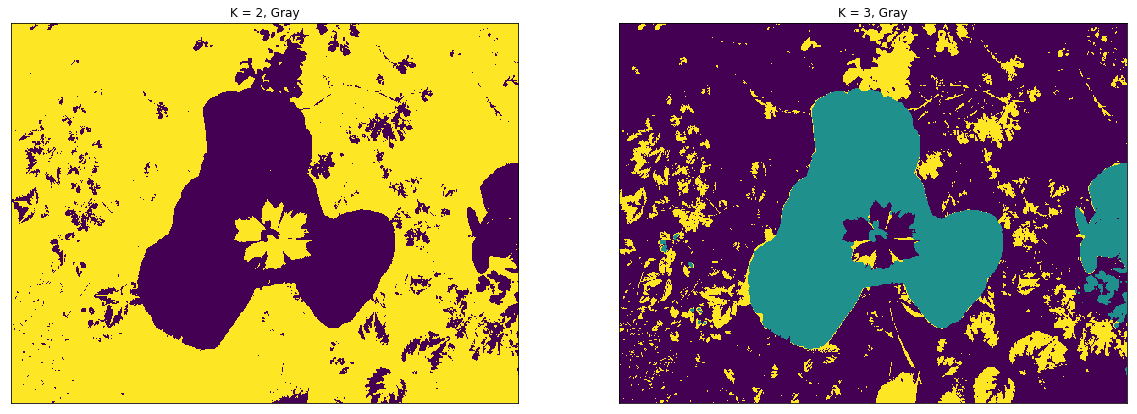

In [3]:
#Gray, Have to run twice for some reason
img2 = cv2.imread('flower.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
newimg2 = img2.reshape((-1,1))
newimg2=np.float32(newimg2)
height, width = img.shape[:2]

l4, c4 = k_means(newimg, 2, 5)
l5, c5 = k_means(newimg, 3, 5)

im4 = np.reshape(l4, (height, width))
im5 = np.reshape(l5, (height, width))

plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(im4)
plt.title('K = 2, Gray'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(im5)
plt.title('K = 3, Gray'), plt.xticks([]), plt.yticks([])
plt.show()


(Text(0.5,1,'K = 3, Completion'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

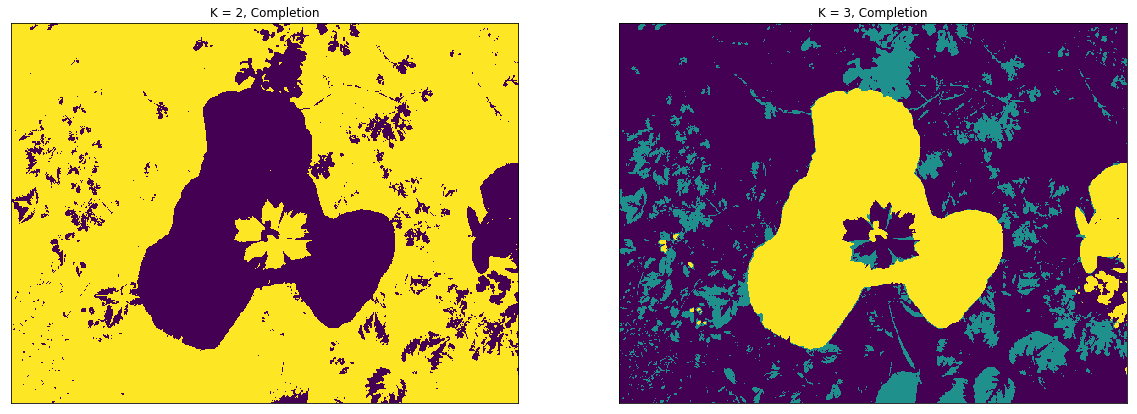

In [4]:
#Completion Regular
height, width = img.shape[:2]
l6, c6 = k_means(newimg, 2, 10)
l7, c7 = k_means(newimg, 3, 10)

im6 = np.reshape(l6, (height, width))
im7 = np.reshape(l7, (height, width))

plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(im6)
plt.title('K = 2, Completion'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(im7)
plt.title('K = 3, Completion'), plt.xticks([]), plt.yticks([])


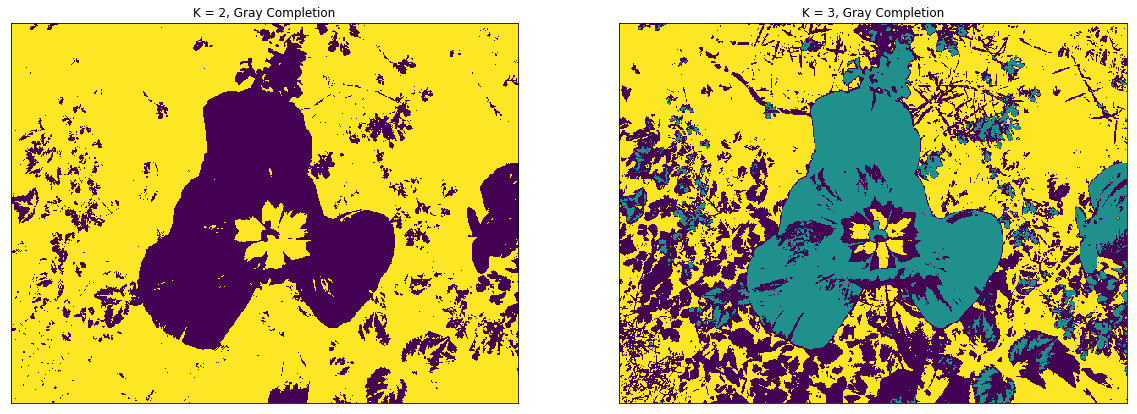

In [8]:
#Completion Gray, run twice
#Gray, Have to run twice for some reason
img3 = cv2.imread('flower.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
newimg3 = img2.reshape((-1,1))
newimg3=np.float32(newimg3)

l8, c8 = k_means(newimg3, 2, 7)
l9, c9 = k_means(newimg3, 3, 7)

im8 = np.reshape(l8, (height, width))
im9 = np.reshape(l9, (height, width))

plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(im8)
plt.title('K = 2, Gray Completion'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(im9)
plt.title('K = 3, Gray Completion'), plt.xticks([]), plt.yticks([])
plt.show()


### Expected Maximization

### Normalized Graph Cut, Mean Shift

In [48]:
#Graph Cut

# Read image
def graphcut(compact, nseg, threshs):
    img=cv2.imread('flower.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # apply k-means. This will generate super pixels
    labels1 = segmentation.slic(img, compactness=compact, n_segments=nseg)
    out1 = color.label2rgb(labels1, img, kind='avg')
    plt.imshow(out1); plt.show()


    g = graph.rag_mean_color(img, labels1, mode='similarity')


    labels2 = graph.cut_normalized(labels1, g, thresh=threshs)
    out2 = color.label2rgb(labels2, img, kind='avg')

    # display
    plt.figure(figsize=(10,5)),
    plt.subplot(122), plt.imshow(out2)
    plt.title("Comp, Nseg, Thresh: "+str(compact)+","+str(nseg)+","+str(threshs)), plt.xticks([]), plt.yticks([])
    plt.show()

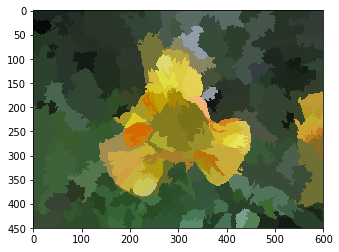

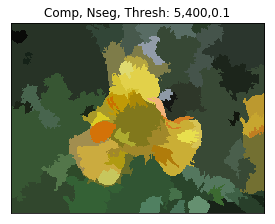

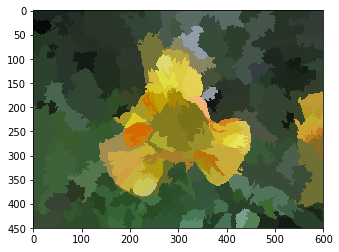

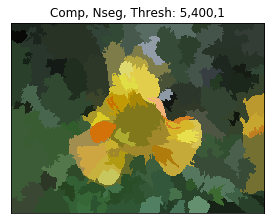

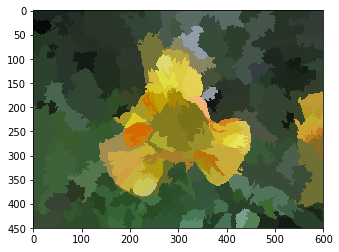

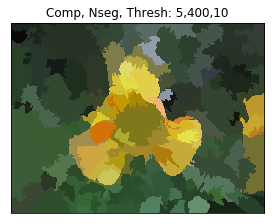

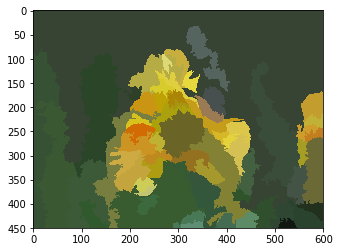

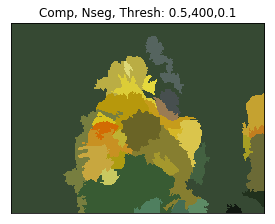

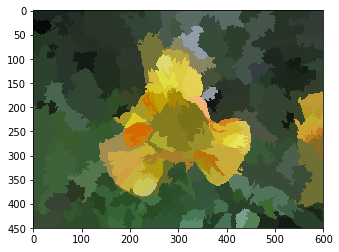

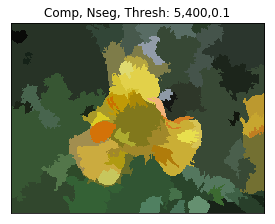

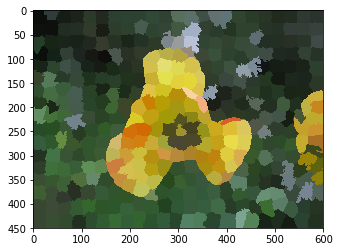

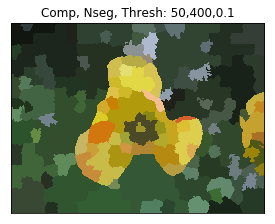

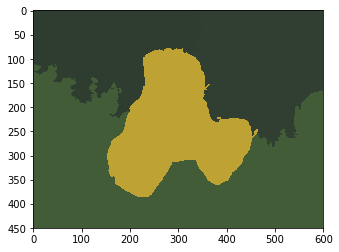

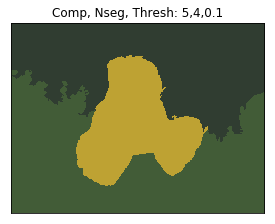

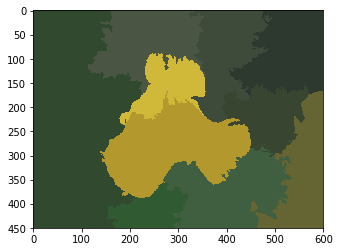

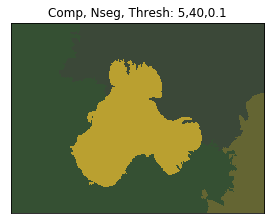

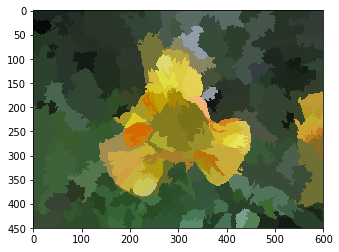

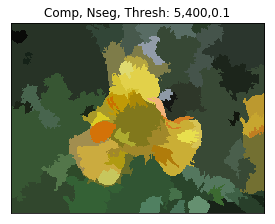

In [6]:
graphcut(5,400,0.1)
graphcut(5,400,1)
graphcut(5,400,10)

graphcut(0.5,400,0.1)
graphcut(5,400,0.1)
graphcut(50,400,0.1)

graphcut(5,4,0.1)
graphcut(5,40,0.1)
graphcut(5,400,0.1)


compactness: A greater compactness makes the image more defined, places more value on individual pixels. <br />
n_segments: More labels are created, and hence more pixles are clumped into a cluster, hence more definition. <br />
Threshold: As we increase threshold, more pixels remain seperate. Smaller threshold allowes pixels to group.


In [7]:
#Mean Shift
# Read image
def meanshift(rat, ksize, maxd):
    img = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)
 
    feature_params = dict( ratio=rat,
                        kernel_size=ksize,
                        max_dist=maxd)

    label = quickshift(img, **feature_params)
    out = color.label2rgb(label, img, kind='avg')
    # display
    plt.figure(figsize=(10,10)),
    plt.subplot(2,2,1), plt.imshow(label)
    plt.title("Ratio,Ksize,Maxdist="+str(rat)+","+str(ksize)+","+str(maxd)), plt.xticks([]), plt.yticks([])
    plt.show()

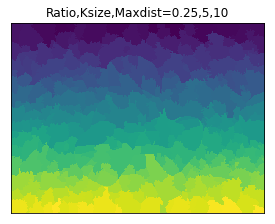

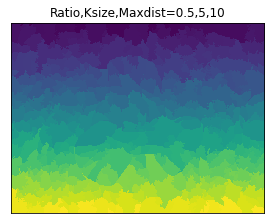

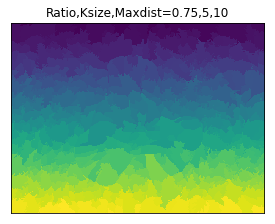

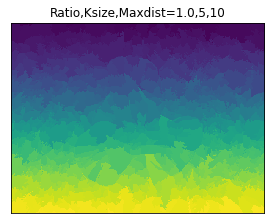

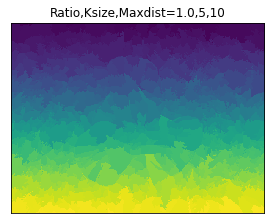

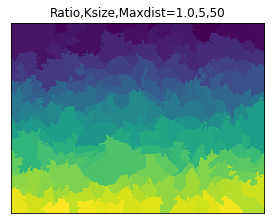

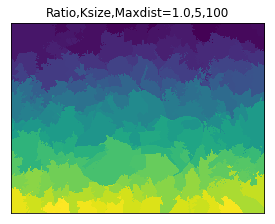

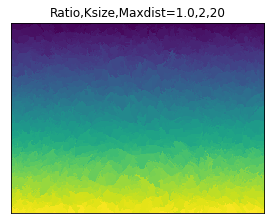

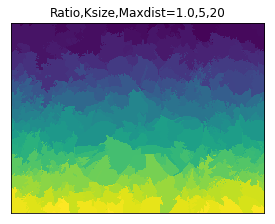

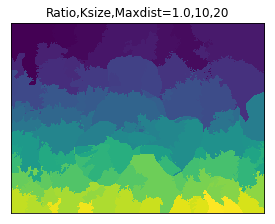

In [8]:
#meanshift(rat, ksize, maxd)
meanshift(0.25, 5, 10)
meanshift(0.5, 5, 10)
meanshift(0.75, 5, 10)
meanshift(1.0, 5, 10)

meanshift(1.0, 5, 10)
meanshift(1.0, 5, 50)
meanshift(1.0, 5, 100)

meanshift(1.0, 2, 20)
meanshift(1.0, 5, 20)
meanshift(1.0, 10, 20)






Ratio: As we increase the ratio we get more distinct colors. <br />
Kernel Size: Less definitions, less clusters. Pixels are clumped together more often as we increase K_size, and they are less distinct. <br />
Max_dist: As we increase max dist, image becomes less defined, we have less clusters.